# Predicting antibody titers from RNA-seq 

RNA-seq datasets were generated from 15 individuals, before and after each COVID-19 vaccination (24h). To evaluate how the early transcriptional changes can affect the antibody titers later on, we have calculated the fold-changes between 24h/0h transcriptome for every individidual.
Among those 15 individuals, 7 have had confirmed COVID_19 and 8 were naïve. For that reason, it is expected that exposed individuals have higher titers so the grouping for training and testing datasets try to take into account equal separation of groups between datasets.


In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in the data to a pandas DataFrame using the read_csv method.
test_index = [3,8]

train=pd.read_csv('../data/machine_learning_dataset/fold_changes_RPKMs.csv')
train.loc[train.group == "Neg", 'group'] = 0
train.loc[train.group == "Pos", 'group'] = 1
train['Spike_W6_log10'] = np.log10(train['Spike_W6'])
spike_col=train['Spike_W6_log10']
train.drop(labels=['Spike_W6_log10'], axis=1,inplace = True)
train.insert(0, 'Spike_W6_log10', spike_col)
    
test=train.iloc[test_index]
train=train.drop(train.index[test_index])


# We are using the train data as placeholder for the test data,
# so we can implement code to run predictions on the test pandas DataFrame as well.
test=train.iloc[test_index]
train

,Spike_W6_log10,sample_ID,subject_ID,group,Spike_W6,avidity_classes,A2M_dose1,A2M_dose2,A2M-AS1_dose1,A2M-AS1_dose2,...,ZSWIM4_dose2,ZSWIM8_dose1,ZSWIM8_dose2,ZWILCH_dose1,ZWILCH_dose2,ZXDB_dose1,ZXDB_dose2,ZXDC_dose1,ZXDC_dose2,prior_COVID.19
0,0.568500,222-14,222.14,neg,3.702541,class1,-2.170187,0.219832,-0.030261,0.814877,...,0.314637,-0.178017,-1.048389,-1.707478,-1.236210,-0.403240,1.241152,-1.888219,-1.224127,0
1,0.601899,222-2,222.20,neg,3.998521,class1,0.276567,0.355511,-0.127104,1.169719,...,-2.018053,-1.173325,0.418502,-1.470061,-1.294248,0.184471,0.144756,0.702474,-1.143890,0
2,0.633819,222-7,222.70,neg,4.303477,class1,-0.297356,-1.159466,-1.466006,0.421482,...,-0.295529,-0.018055,-0.403869,0.287537,-0.906877,-0.544984,1.037460,0.363786,1.607384,0
4,0.665475,222-12,222.12,pos,4.628869,class1,0.347320,0.212393,-0.323153,0.281211,...,0.686188,-0.699620,-0.840367,-0.095507,-0.959997,1.574678,-1.031766,-0.527346,1.540319,1
5,0.657644,222-18,222.18,pos,4.546148,class1,0.091981,0.688211,2.124407,0.433987,...,-0.496395,0.042874,-0.223535,1.886485,0.607130,-0.650487,-0.151566,-0.886254,0.587323,1
6,0.610960,222-19,222.19,pos,4.082821,class1,1.796241,-0.238284,-0.218407,-1.545775,...,-0.999127,0.914957,-0.364703,0.966966,-0.074857,-0.366155,0.166002,0.434108,-0.651381,1
7,0.677384,222-15,222.15,neg,4.757559,class2,-2.360512,0.413470,-0.118547,0.125717,...,-0.969972,0.627280,0.951135,0.516681,-0.742343,-0.049552,0.786750,-1.053889,0.851555,0
9,0.682479,222-25,222.25,pos,4.813704,class2,-0.498934,0.621957,0.795035,0.157211,...,-0.208337,-1.379966,0.315769,-0.450871,0.112869,-0.746043,1.221859,-0.103418,0.742653,1
10,0.564892,222-5,222.50,neg,3.671913,class1,-1.775780,-0.040282,-0.425782,-0.533100,...,1.330696,0.013733,2.720512,-0.100206,1.674462,-0.889916,0.391182,0.308231,-0.008356,0
11,0.611045,222-10,222.10,neg,4.083617,class1,0.631900,1.228087,-0.016709,-0.026256,...,0.675842,0.438578,0.583326,-0.448498,0.422483,1.336621,-1.725021,1.458247,1.533834,0


## Cross-validation sets

LOOCV will be used
test

## Scaling

Data was already scaled

## Setting up the data for training.
Set up the data by making a numpy matrix of the training data called `X`, numpy vector with the target values `Y`.


In [6]:
from sklearn.model_selection import PredefinedSplit


(size_x,size_y)=train.shape
target_index=size_y-2



#Put the training data in X the .values method returns a numpy matrix of the numbers in the DataFrame.
X=train.iloc[:,6:].values #,0:target_index]

#Create the same for the test (currently this is the same as train just to keep to code running)
X_test=test.iloc[:,6:].values
#print X

#Put the target value in Y
Y=train['Spike_W6_log10'].values
Y_test=test['Spike_W6_log10'].values



## Training Machine Learning Methods
Finally we can train machine learning methods... 

In [7]:
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.kernel_ridge import KernelRidge


LR: -0.003711 (0.004496)
LRR: -0.003304 (0.004323)
LLR: -0.003132 (0.004327)
DTR: -0.007815 (0.008363)
KNN: -0.003387 (0.004549)
CART: -0.006597 (0.010002)
RF: -0.003085 (0.004312)
KERNEL: -1.373353 (0.152250)


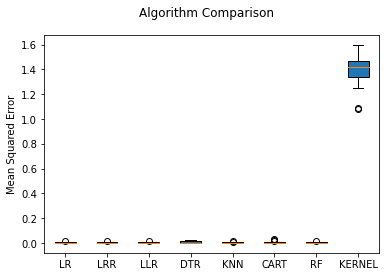

In [10]:
# Prepare configuration for cross validation test harness
seed = 7
# Prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('LRR', Ridge()))
models.append(('LLR', Lasso()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('KERNEL', KernelRidge()))
# Evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'
for name, model in models:
	kfold = model_selection.KFold(n_splits=len(X), random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot([abs(ele) for ele in results],patch_artist=True)
plt.ylabel("Mean Squared Error")
ax.set_xticklabels(names)
plt.savefig('../results/ML_methods_MSA.pdf', bbox_inches='tight')
plt.show()
plt.close()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we